In [8]:
import json
import pandas as pd
import time
import numpy as np
import datetime
from time import gmtime, strftime
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point

In [9]:
# Looking at json file structure

In [10]:
import json
 
with open('Irma0830FL.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dict
print(json.dumps(tweet, indent=4)) # pretty-print

{
    "quote_count": 0, 
    "contributors": null, 
    "truncated": false, 
    "text": "Race at America\u2019s Best Beach! #wearemultirace @ Fort De Soto, Florida https://t.co/OeSNjV7mXR", 
    "is_quote_status": false, 
    "in_reply_to_status_id": null, 
    "reply_count": 0, 
    "id": 918662694839955456, 
    "favorite_count": 0, 
    "source": "<a href=\"http://instagram.com\" rel=\"nofollow\">Instagram</a>", 
    "retweeted": false, 
    "coordinates": {
        "type": "Point", 
        "coordinates": [
            -82.72846536, 
            27.61535993
        ]
    }, 
    "timestamp_ms": "1507861229034", 
    "entities": {
        "user_mentions": [], 
        "symbols": [], 
        "hashtags": [
            {
                "indices": [
                    30, 
                    45
                ], 
                "text": "wearemultirace"
            }
        ], 
        "urls": [
            {
                "url": "https://t.co/OeSNjV7mXR", 
                "unw

In [11]:
filename='Irma0830FL.json'
with open(filename,'r') as f:
    tweets=(json.loads(line) for i,line in enumerate(f.readlines()))

In [12]:
print(tweets)

<generator object <genexpr> at 0x11fdaee10>


In [13]:
data1={"user_id":[], "Dates":[],"coordinates":[]}

In [14]:
for t in tweets:
    if t['geo'] is None: # Handling/Removing the records having null values in geo.
        continue
    data1['user_id'].append(t['user']['id'])
    time_struct=time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(t['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
    data1['Dates'].append(time_struct)
    data1['coordinates'].append(t['geo']['coordinates']) 

In [15]:
df=pd.DataFrame(data1)

In [16]:
df.head()

,Dates,coordinates,user_id
0,2017-10-13 02:20:29,"[27.61535993, -82.72846536]",260934167
1,2017-10-13 02:20:29,"[30.2925, -81.38988]",33648769
2,2017-10-13 02:21:23,"[28.7928, -81.0594]",132973153
3,2017-10-13 02:21:28,"[25.7890516, -80.1401835]",733478166
4,2017-10-13 02:21:10,"[30.3149, -81.6901]",406722414


In [17]:
df[['Date', 'Time']] = df.Dates.str.split(' ', expand = True)

In [18]:
df[['Lat','Long']] = pd.DataFrame(df.coordinates.values.tolist(), index= df.index)

In [19]:
df.head()

,Dates,coordinates,user_id,Date,Time,Lat,Long
0,2017-10-13 02:20:29,"[27.61535993, -82.72846536]",260934167,2017-10-13,02:20:29,27.615360,-82.728465
1,2017-10-13 02:20:29,"[30.2925, -81.38988]",33648769,2017-10-13,02:20:29,30.292500,-81.389880
2,2017-10-13 02:21:23,"[28.7928, -81.0594]",132973153,2017-10-13,02:21:23,28.792800,-81.059400
3,2017-10-13 02:21:28,"[25.7890516, -80.1401835]",733478166,2017-10-13,02:21:28,25.789052,-80.140184
4,2017-10-13 02:21:10,"[30.3149, -81.6901]",406722414,2017-10-13,02:21:10,30.314900,-81.690100


In [20]:
# Filtering by date

In [21]:
df=df[(df['Dates'] > '2017-08-15 01:00:00') & (df['Dates'] <= '2017-09-30 04:00:00')]

In [22]:
df.head()

,Dates,coordinates,user_id,Date,Time,Lat,Long
28,2017-09-03 20:10:52,"[29.18878, -81.04947]",1914800148,2017-09-03,20:10:52,29.188780,-81.049470
29,2017-09-03 20:10:54,"[26.20940193, -80.12229159]",322308540,2017-09-03,20:10:54,26.209402,-80.122292
30,2017-09-03 20:10:28,"[33.7489, -84.3881]",175574959,2017-09-03,20:10:28,33.748900,-84.388100
31,2017-09-03 20:10:30,"[30.44, -84.28]",95794799,2017-09-03,20:10:30,30.440000,-84.280000
32,2017-09-03 20:10:37,"[29.88876, -81.31607]",2335597730,2017-09-03,20:10:37,29.888760,-81.316070


In [23]:
# Looking at tweet count per user

In [31]:
df_count=df.groupby(["user_id"]).size().reset_index(name="counts")

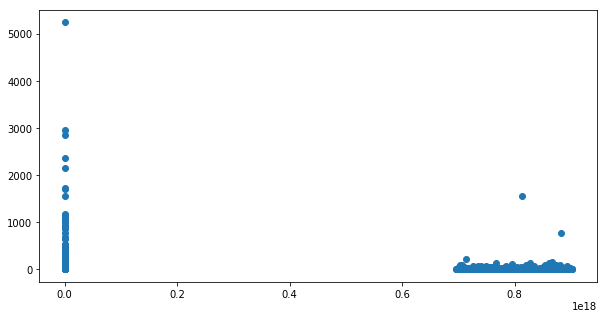

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
  
# plot
plt.scatter( 'user_id', 'counts', data=df_count)
#plt.ticklabel_format(useOffset=False, style='plain')
#plt.rcParams['figure.figsize']=(10,5)

plt.show()

In [33]:
# Filtering by tweet count

In [34]:
df_count=df_count[(df_count.counts >5) & (df_count.counts <600)]

In [35]:
df_count.sort_values('user_id',ascending=False)

,user_id,counts
27536,900705511187861504,14
27533,900225086053113857,8
27532,899795698207608836,14
27529,899639683499610112,11
27527,898997766650724352,23
27523,897985028688412673,36
27520,897796053998739456,17
27515,897293506317778944,40
27514,897291719636602883,28
27504,895730398797246465,6


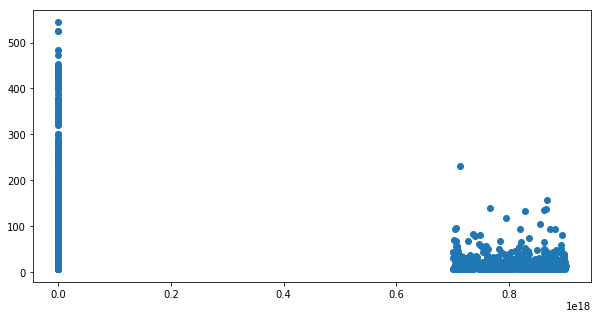

In [36]:
plt.scatter( 'user_id', 'counts', data=df_count)
#plt.ticklabel_format(useOffset=False, style='plain')

plt.show()

In [37]:
len(df_count)

9290

In [38]:
a=df_count['user_id'] # Storing the user ids after filtering the counts

In [39]:
df = df[df['user_id'].isin(a)] # Filtering the dataframe by comparing user ids

In [40]:
len(df)

219006

In [41]:
df.head()

,Dates,coordinates,user_id,Date,Time,Lat,Long
29,2017-09-03 20:10:54,"[26.20940193, -80.12229159]",322308540,2017-09-03,20:10:54,26.209402,-80.122292
30,2017-09-03 20:10:28,"[33.7489, -84.3881]",175574959,2017-09-03,20:10:28,33.748900,-84.388100
31,2017-09-03 20:10:30,"[30.44, -84.28]",95794799,2017-09-03,20:10:30,30.440000,-84.280000
32,2017-09-03 20:10:37,"[29.88876, -81.31607]",2335597730,2017-09-03,20:10:37,29.888760,-81.316070
33,2017-09-03 20:10:28,"[27.37748, -82.6344]",15768561,2017-09-03,20:10:28,27.377480,-82.634400


In [42]:
# Analyzing date wise trend of tweets

In [43]:
df_date=df.groupby(["Date"]).size().reset_index(name="counts")

In [44]:
df_date.head()

,Date,counts
0,2017-08-15,4736
1,2017-08-16,5171
2,2017-08-17,5341
3,2017-08-18,5525
4,2017-08-19,6267


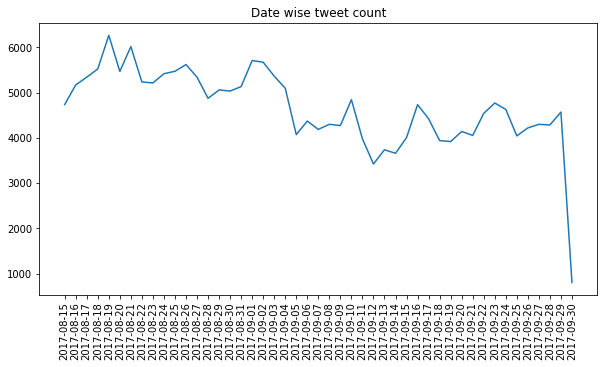

In [46]:

plt.plot( 'Date', 'counts', data=df_date)
plt.title('Date wise tweet count')
plt.xticks(rotation=90)
#plt.show()
plt.rcParams['figure.figsize']=(10,5)


In [47]:
gmt_offset = -4

# Create proper datetime column, apply local GMT offset
df['ts'] = pd.to_datetime(df['Dates'])
df['ts'] = df.ts + pd.to_timedelta(gmt_offset, unit='h')

# Add hour of day and day of week columns
df['hod'] = [t.hour for t in df.ts]
df['dow'] = [t.dayofweek for t in df.ts]

hod_dict = {}
hod_count = {}
dow_dict = {}
dow_count = {}
weekday_dict = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# Process tweets, collect stats
for i in df.index:
    hod = df.loc[i]['hod']
    dow = df.loc[i]['dow']
    imp = df.loc[i]['user_id']

    if hod in hod_dict:
        hod_dict[hod] += int(imp)
        hod_count[hod] += 1
    else:
        hod_dict[hod] = int(imp)
        hod_count[hod] = 1

    if dow in dow_dict:
        dow_dict[dow] += int(imp)
        dow_count[dow] += 1
    else:
        dow_dict[dow] = int(imp)
        dow_count[dow] = 1

print( 'Average impressions per tweet by hour tweeted:')
print ('----------------------------------------------')
for hod in hod_dict:
    print( hod, '-', hod+1, ':', hod_dict[hod]/hod_count[hod], '=>', hod_count[hod], 'tweets')

print( '\nAverage impressions per tweet by day of week tweeted:')
print ('-----------------------------------------------------')
for dow in dow_dict:
    print (weekday_dict[dow], ':', dow_dict[dow]/dow_count[dow], '=>', dow_count[dow])

Average impressions per tweet by hour tweeted:
----------------------------------------------
(0, '-', 1, ':', 40367260875042028L, '=>', 4517, 'tweets')
(1, '-', 2, ':', 36411526404487614L, '=>', 2887, 'tweets')
(2, '-', 3, ':', 36157498345421871L, '=>', 1823, 'tweets')
(3, '-', 4, ':', 23142838702917478L, '=>', 1469, 'tweets')
(4, '-', 5, ':', 17711856179843838L, '=>', 1457, 'tweets')
(5, '-', 6, ':', 32020065654823282L, '=>', 2158, 'tweets')
(6, '-', 7, ':', 31754222044322821L, '=>', 3872, 'tweets')
(7, '-', 8, ':', 24736438481694575L, '=>', 8823, 'tweets')
(8, '-', 9, ':', 32424896710307859L, '=>', 11716, 'tweets')
(9, '-', 10, ':', 40510184074048479L, '=>', 10704, 'tweets')
(10, '-', 11, ':', 43576483241099393L, '=>', 11162, 'tweets')
(11, '-', 12, ':', 46756788531492999L, '=>', 12339, 'tweets')
(12, '-', 13, ':', 47245165346226556L, '=>', 13137, 'tweets')
(13, '-', 14, ':', 42293188014976471L, '=>', 14056, 'tweets')
(14, '-', 15, ':', 38442124135591345L, '=>', 12666, 'tweets')
(15

In [48]:
# Analyzing pre,post and during

In [49]:
df_pre=df[(df['Date'] < '2017-08-30')]

In [50]:
df_pre.head()

,Dates,coordinates,user_id,Date,Time,Lat,Long,ts,hod,dow
390,2017-08-15 05:11:25,"[25.7654, -80.21972]",412456086,2017-08-15,05:11:25,25.765400,-80.219720,2017-08-15 01:11:25,1,1
391,2017-08-15 05:11:37,"[25.7813614, -80.18823458]",32152181,2017-08-15,05:11:37,25.781361,-80.188235,2017-08-15 01:11:37,1,1
393,2017-08-15 05:13:12,"[28.19251785, -82.57380009]",25850383,2017-08-15,05:13:12,28.192518,-82.573800,2017-08-15 01:13:12,1,1
394,2017-08-15 05:13:33,"[25.94444, -80.24383]",439652813,2017-08-15,05:13:33,25.944440,-80.243830,2017-08-15 01:13:33,1,1
395,2017-08-15 05:13:54,"[27.9709, -82.4646]",3427216847,2017-08-15,05:13:54,27.970900,-82.464600,2017-08-15 01:13:54,1,1


In [51]:
df_count_pre=df_pre.groupby(["user_id"]).size().reset_index(name="counts")

In [52]:
len(df_count_pre)

8851

In [53]:
df_dur=df[(df['Date'] >= '2017-08-30') & (df['Date'] <= '2017-09-12')]

In [54]:
df_dur.head()

,Dates,coordinates,user_id,Date,Time,Lat,Long,ts,hod,dow
29,2017-09-03 20:10:54,"[26.20940193, -80.12229159]",322308540,2017-09-03,20:10:54,26.209402,-80.122292,2017-09-03 16:10:54,16,6
30,2017-09-03 20:10:28,"[33.7489, -84.3881]",175574959,2017-09-03,20:10:28,33.748900,-84.388100,2017-09-03 16:10:28,16,6
31,2017-09-03 20:10:30,"[30.44, -84.28]",95794799,2017-09-03,20:10:30,30.440000,-84.280000,2017-09-03 16:10:30,16,6
32,2017-09-03 20:10:37,"[29.88876, -81.31607]",2335597730,2017-09-03,20:10:37,29.888760,-81.316070,2017-09-03 16:10:37,16,6
33,2017-09-03 20:10:28,"[27.37748, -82.6344]",15768561,2017-09-03,20:10:28,27.377480,-82.634400,2017-09-03 16:10:28,16,6


In [55]:
df_count_dur=df_dur.groupby(["user_id"]).size().reset_index(name="counts")

In [56]:
len(df_count_dur)

8154

In [57]:
df_post=df[(df['Date'] > '2017-09-12')]

In [58]:
df_post.head()

,Dates,coordinates,user_id,Date,Time,Lat,Long,ts,hod,dow
176,2017-09-19 08:21:10,"[29.24166667, -81.45666667]",1311004520,2017-09-19,08:21:10,29.241667,-81.456667,2017-09-19 04:21:10,4,1
177,2017-09-19 08:22:22,"[25.98198198, -80.29549685]",59047571,2017-09-19,08:22:22,25.981982,-80.295497,2017-09-19 04:22:22,4,1
178,2017-09-19 08:22:08,"[25.8605, -80.294]",15253,2017-09-19,08:22:08,25.860500,-80.294000,2017-09-19 04:22:08,4,1
179,2017-09-19 08:23:43,"[26.0129, -80.3137]",3602938216,2017-09-19,08:23:43,26.012900,-80.313700,2017-09-19 04:23:43,4,1
180,2017-09-19 08:23:42,"[30.33269, -81.6645]",822124488288518146,2017-09-19,08:23:42,30.332690,-81.664500,2017-09-19 04:23:42,4,1


In [59]:
df_count_post=df_post.groupby(["user_id"]).size().reset_index(name="counts")

In [60]:
len(df_count_post)

7859

In [61]:
# Comparing user ids from pre, during & post times and filtering records such that a user id is present in all the time periods

In [62]:
dfs = [df_count_pre, df_count_dur, df_count_post]


In [63]:
df_count_post.head()

,user_id,counts
0,4642,11
1,10285,4
2,15253,36
3,20653,7
4,66253,39


In [64]:
df_final = reduce(lambda left,right: pd.merge(left,right,on='user_id'), dfs)


In [65]:
df_final=df_final[(df_final['counts_x'] >= 2) & (df_final['counts_y'] >= 2) & (df_final['counts'] >= 2)]

In [66]:
df_final.head()

,user_id,counts_x,counts_y,counts
0,4642,7,6,11
1,10285,15,12,4
2,15253,13,23,36
3,20653,10,4,7
4,66253,41,56,39


In [67]:
len(df_final)

4858

In [68]:
b=df_final['user_id'] # Storing the user ids after filtering the counts

In [69]:
df_pre_fil = df_pre[df_pre['user_id'].isin(b)] # Filtering the dataframe by comparing user ids

In [70]:
df_count_pre_fil=df_pre_fil.groupby(["user_id"]).size().reset_index(name="counts")

In [71]:
len(df_count_pre_fil)

4858

In [72]:
df_dur_fil = df_dur[df_dur['user_id'].isin(b)] # Filtering the dataframe by comparing user ids

In [73]:
df_count_dur_fil=df_dur_fil.groupby(["user_id"]).size().reset_index(name="counts")

In [74]:
len(df_count_dur_fil)

4858

In [75]:
df_post_fil = df_post[df_post['user_id'].isin(b)] # Filtering the dataframe by comparing user ids

In [76]:
df_count_post_fil=df_post_fil.groupby(["user_id"]).size().reset_index(name="counts")

In [77]:
len(df_count_post_fil)

4858

In [78]:
df_pre_c=df_pre_fil.groupby('user_id', as_index=False)['Lat','Long'].mean() # Calculating centroid for each user

In [79]:
df_pre_c.head()

,user_id,Lat,Long
0,4642,28.080507,-80.602480
1,10285,28.429047,-81.541426
2,15253,25.857565,-80.308888
3,20653,26.053243,-80.259264
4,66253,28.454447,-81.486652


In [80]:
df_dur_c=df_dur_fil.groupby('user_id', as_index=False)['Lat','Long'].mean() # Calculating centroid for each user

In [81]:
df_dur_c.head()

,user_id,Lat,Long
0,4642,28.206838,-80.662297
1,10285,29.008542,-82.052100
2,15253,25.908191,-80.326619
3,20653,26.051941,-80.269803
4,66253,28.361518,-81.367687


In [82]:
df_post_c=df_post_fil.groupby('user_id', as_index=False)['Lat','Long'].mean() # Calculating centroid for each user

In [83]:
df_post_c.head()

,user_id,Lat,Long
0,4642,28.084476,-80.627911
1,10285,28.827987,-81.495733
2,15253,25.844211,-80.295348
3,20653,26.018784,-80.172919
4,66253,28.452702,-81.492440


In [84]:
# Making Point coordinates

In [85]:
df_pre_c["geometry"] = df_pre_c.apply(lambda row: Point(row["Long"], row["Lat"]), axis=1)


In [86]:
del(df_pre_c["Lat"], df_pre_c["Long"])

In [87]:
df_pre_c.head()

,user_id,geometry
0,4642,POINT (-80.60247961857142 28.08050734857143)
1,10285,POINT (-81.54142570199998 28.42904730599999)
2,15253,POINT (-80.30888833230769 25.85756542769231)
3,20653,POINT (-80.259264376 26.053242548)
4,66253,POINT (-81.48665249756097 28.45444734170731)


In [88]:
points = geopandas.GeoDataFrame(df_pre_c, geometry="geometry")

In [116]:
import fiona
shape = fiona.open("cb_2017_us_county_5m.shp")
print shape.schema

#first feature of the shapefile
first = shape.next()
print first # (GeoJSON format)

{'geometry': 'Polygon', 'properties': OrderedDict([(u'STATEFP', 'str:2'), (u'COUNTYFP', 'str:3'), (u'COUNTYNS', 'str:8'), (u'AFFGEOID', 'str:14'), (u'GEOID', 'str:5'), (u'NAME', 'str:100'), (u'LSAD', 'str:2'), (u'ALAND', 'float:14'), (u'AWATER', 'float:14')])}
{'geometry': {'type': 'Polygon', 'coordinates': [[(-114.755618, 36.087165999999996), (-114.753638, 36.090705), (-114.747079, 36.097004999999996), (-114.736165, 36.104366999999996), (-114.717293, 36.107686), (-114.709771, 36.107742), (-114.666538, 36.117343), (-114.66289, 36.119932), (-114.65995, 36.124145), (-114.631716, 36.142306), (-114.627855, 36.141011999999996), (-114.621883, 36.13213), (-114.616694, 36.130100999999996), (-114.608264, 36.133949), (-114.597212, 36.142103), (-114.572031, 36.15161), (-114.545789, 36.152248), (-114.511721, 36.150956), (-114.506711, 36.148277), (-114.504631, 36.145629), (-114.50482, 36.142413999999995), (-114.505387, 36.137496), (-114.506144, 36.134659), (-114.505766, 36.131444), (-114.504442, 36

In [117]:
from geopandas import gpd
#points=gpd.GeoDataFrame.from_file("points.shp")
poly=gpd.GeoDataFrame.from_file("cb_2017_us_county_5m.shp")
#poly=poly.to_crs(gdf_pre_c.crs)
poly.crs=points.crs
pointsonpoly=gpd.sjoin(points,poly, how='left', op='within')

In [118]:
pointsonpoly.head()

,user_id,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,4642,POINT (-80.60247961857142 28.08050734857143),2989.0,12,009,00295749,0500000US12009,12009,Brevard,06,2.629334e+09,1.403340e+09
1,10285,POINT (-81.54142570199998 28.42904730599999),485.0,12,095,00295750,0500000US12095,12095,Orange,06,2.339138e+09,2.591412e+08
2,15253,POINT (-80.30888833230769 25.85756542769231),2822.0,12,086,00295755,0500000US12086,12086,Miami-Dade,06,4.917515e+09,1.379206e+09
3,20653,POINT (-80.259264376 26.053242548),2949.0,12,011,00295753,0500000US12011,12011,Broward,06,3.120024e+09,3.060531e+08
4,66253,POINT (-81.48665249756097 28.45444734170731),485.0,12,095,00295750,0500000US12095,12095,Orange,06,2.339138e+09,2.591412e+08


In [119]:
len(pointsonpoly)

4858

In [120]:
polyy=poly[(poly['STATEFP'] == '12')]

In [121]:
len(polyy)

67

In [122]:
pointpoly=pointsonpoly[(pointsonpoly['STATEFP'] == '12')]
pointspoly=pointpoly.groupby(["COUNTYFP"]).size().reset_index(name="counts")
pointspoly.head()

,COUNTYFP,counts
0,001,45
1,003,3
2,005,22
3,007,5
4,009,59


In [123]:
len(pointspoly)

63

/Users/saurabhthakrani/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


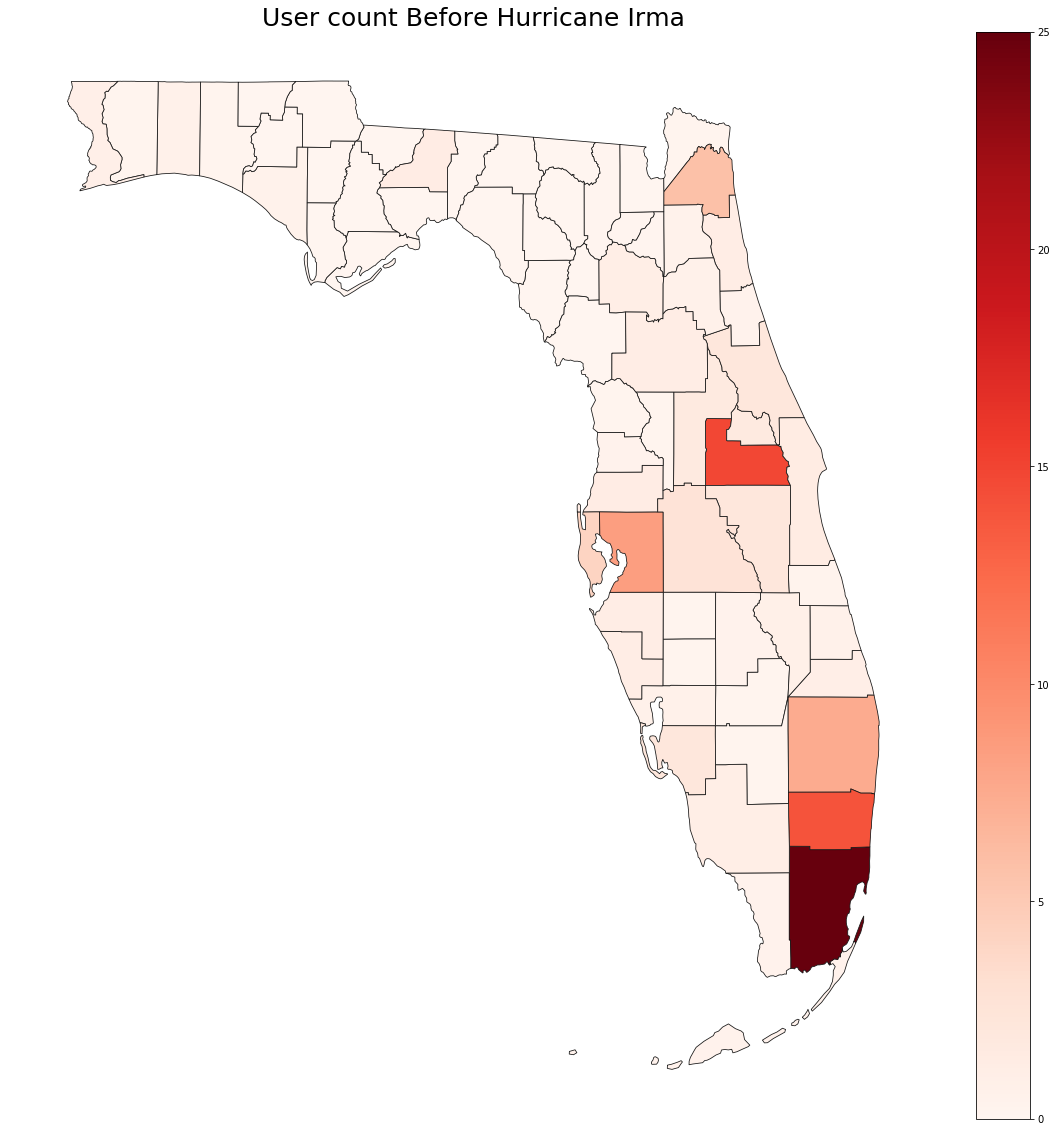

In [124]:
merged=polyy.set_index('COUNTYFP').join(pointspoly.set_index('COUNTYFP'))
variable = 'counts'
#vmin,vmax=0,0
fig, ax = plt.subplots(1, figsize=(20,20))
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.1')
ax.axis('off')
ax.set_title('User count Before Hurricane Irma', fontdict= {'fontsize': '25', 'fontweight': '3'})
sm= plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=25))
sm._A = []
cbar = fig.colorbar(sm)

In [125]:
df_dur_c["geometry"] = df_dur_c.apply(lambda row: Point(row["Long"], row["Lat"]), axis=1)

In [126]:
del(df_dur_c["Lat"], df_dur_c["Long"])

In [127]:
df_dur_c.head()

,user_id,geometry
0,4642,POINT (-80.66229659166666 28.20683793666667)
1,10285,POINT (-82.05209976333333 29.0085421425)
2,15253,POINT (-80.32661875739133 25.90819101913044)
3,20653,POINT (-80.26980330250001 26.051941035)
4,66253,POINT (-81.3676866757143 28.36151829089286)


In [128]:
points1 = geopandas.GeoDataFrame(df_dur_c, geometry="geometry")

In [129]:
from geopandas import gpd
poly=gpd.GeoDataFrame.from_file("cb_2017_us_county_5m.shp")
poly.crs=points1.crs
pointsonpoly1=gpd.sjoin(points1,poly, how='left', op='within')

In [130]:
pointsonpoly1.head()

,user_id,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,4642,POINT (-80.66229659166666 28.20683793666667),2989.0,12,009,00295749,0500000US12009,12009,Brevard,06,2.629334e+09,1.403340e+09
1,10285,POINT (-82.05209976333333 29.0085421425),3187.0,12,083,00306922,0500000US12083,12083,Marion,06,4.114227e+09,1.920489e+08
2,15253,POINT (-80.32661875739133 25.90819101913044),2822.0,12,086,00295755,0500000US12086,12086,Miami-Dade,06,4.917515e+09,1.379206e+09
3,20653,POINT (-80.26980330250001 26.051941035),2949.0,12,011,00295753,0500000US12011,12011,Broward,06,3.120024e+09,3.060531e+08
4,66253,POINT (-81.3676866757143 28.36151829089286),485.0,12,095,00295750,0500000US12095,12095,Orange,06,2.339138e+09,2.591412e+08


In [131]:
len(pointsonpoly1)

4858

In [132]:
pointpoly1=pointsonpoly1[(pointsonpoly1['STATEFP'] == '12')]
pointspoly1=pointpoly1.groupby(["COUNTYFP"]).size().reset_index(name="counts")
pointspoly1.head()

,COUNTYFP,counts
0,001,46
1,003,3
2,005,16
3,007,5
4,009,62


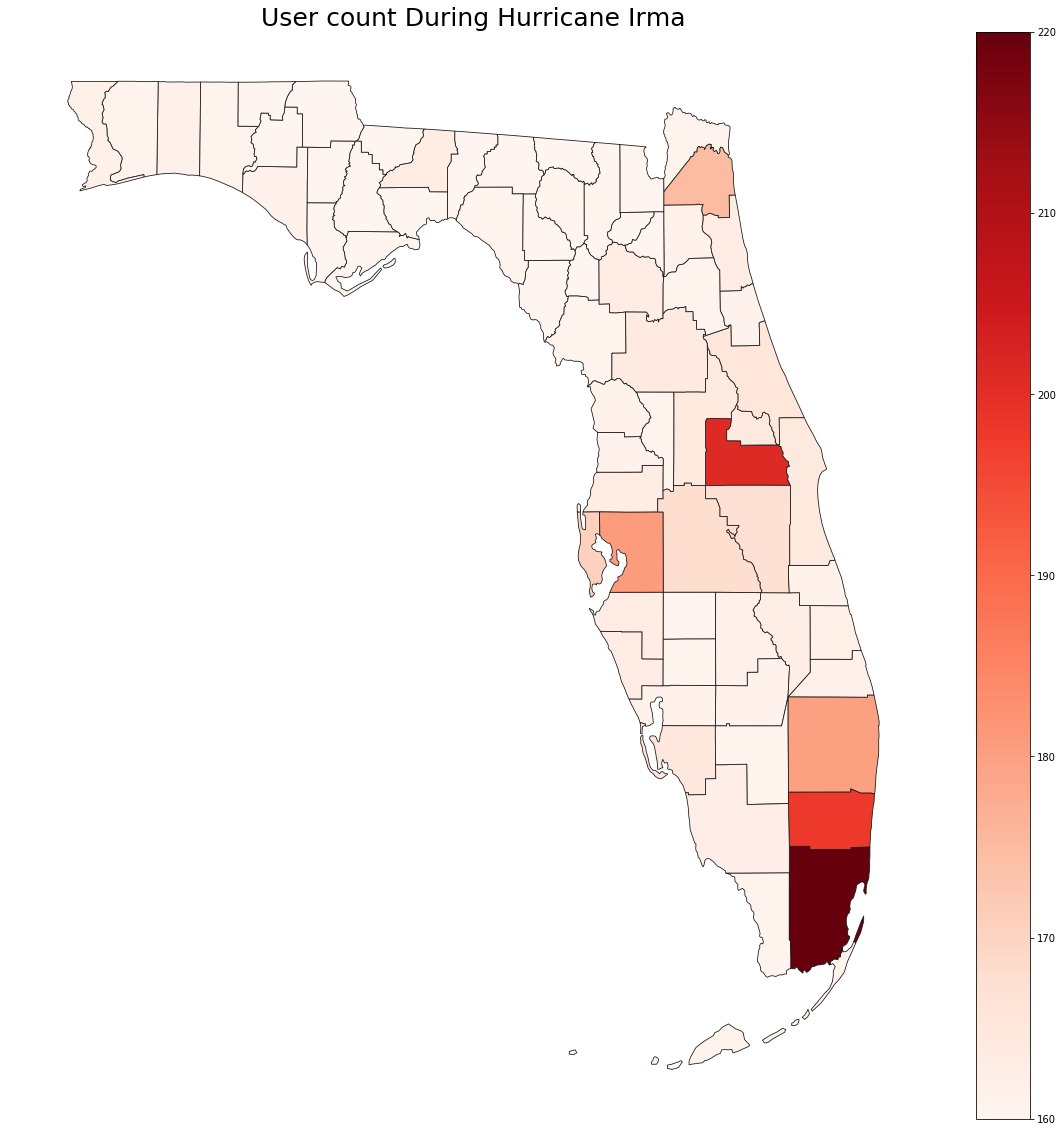

In [133]:
merged=polyy.set_index('COUNTYFP').join(pointspoly1.set_index('COUNTYFP'))
variable = 'counts'
vmin,vmax=160,220
fig, ax = plt.subplots(1, figsize=(20,20))
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.1')
ax.axis('off')
ax.set_title('User count During Hurricane Irma', fontdict= {'fontsize': '25', 'fontweight': '3'})
sm= plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)



In [134]:
df_post_c["geometry"] = df_post_c.apply(lambda row: Point(row["Long"], row["Lat"]), axis=1)

In [135]:
del(df_post_c["Lat"], df_post_c["Long"])

In [136]:
df_post_c.head()

,user_id,geometry
0,4642,POINT (-80.62791088363637 28.08447594636364)
1,10285,POINT (-81.495732695 28.82798658)
2,15253,POINT (-80.2953477147222 25.84421118472223)
3,20653,POINT (-80.17291866000001 26.01878427142858)
4,66253,POINT (-81.49244009871794 28.45270160358974)


In [137]:
points2 = geopandas.GeoDataFrame(df_post_c, geometry="geometry")

In [138]:
from geopandas import gpd
poly=gpd.GeoDataFrame.from_file("cb_2017_us_county_5m.shp")
poly.crs=points2.crs
pointsonpoly2=gpd.sjoin(points2,poly, how='left', op='within')

In [139]:
pointsonpoly2.head(20)

,user_id,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,4642,POINT (-80.62791088363637 28.08447594636364),2989.0,12,009,00295749,0500000US12009,12009,Brevard,06,2.629334e+09,1.403340e+09
1,10285,POINT (-81.495732695 28.82798658),1706.0,12,069,00308551,0500000US12069,12069,Lake,06,2.436873e+09,5.596020e+08
2,15253,POINT (-80.2953477147222 25.84421118472223),2822.0,12,086,00295755,0500000US12086,12086,Miami-Dade,06,4.917515e+09,1.379206e+09
3,20653,POINT (-80.17291866000001 26.01878427142858),2949.0,12,011,00295753,0500000US12011,12011,Broward,06,3.120024e+09,3.060531e+08
4,66253,POINT (-81.49244009871794 28.45270160358974),485.0,12,095,00295750,0500000US12095,12095,Orange,06,2.339138e+09,2.591412e+08
5,641963,POINT (-81.432385165 28.66239044),1917.0,12,117,00303665,0500000US12117,12117,Seminole,06,8.017093e+08,9.271934e+07
6,665913,POINT (-81.63275666666665 30.17549666666666),2592.0,12,031,00293656,0500000US12031,12031,Duval,06,1.975765e+09,4.030355e+08
7,717443,POINT (-86.48926521739126 31.84592318840576),160.0,01,013,00161532,0500000US01013,01013,Butler,06,2.011985e+09,2.718248e+06
8,759933,POINT (-80.13079999999999 26.1741),2949.0,12,011,00295753,0500000US12011,12011,Broward,06,3.120024e+09,3.060531e+08
9,765617,POINT (-81.37805227199999 28.55836065),485.0,12,095,00295750,0500000US12095,12095,Orange,06,2.339138e+09,2.591412e+08


In [140]:
len(pointsonpoly2)

4858

In [141]:
pointpoly2=pointsonpoly2[(pointsonpoly2['STATEFP'] == '12')]
pointspoly2=pointpoly2.groupby(["COUNTYFP"]).size().reset_index(name="counts")
pointspoly2.head()

,COUNTYFP,counts
0,001,55
1,003,1
2,005,21
3,007,4
4,009,65


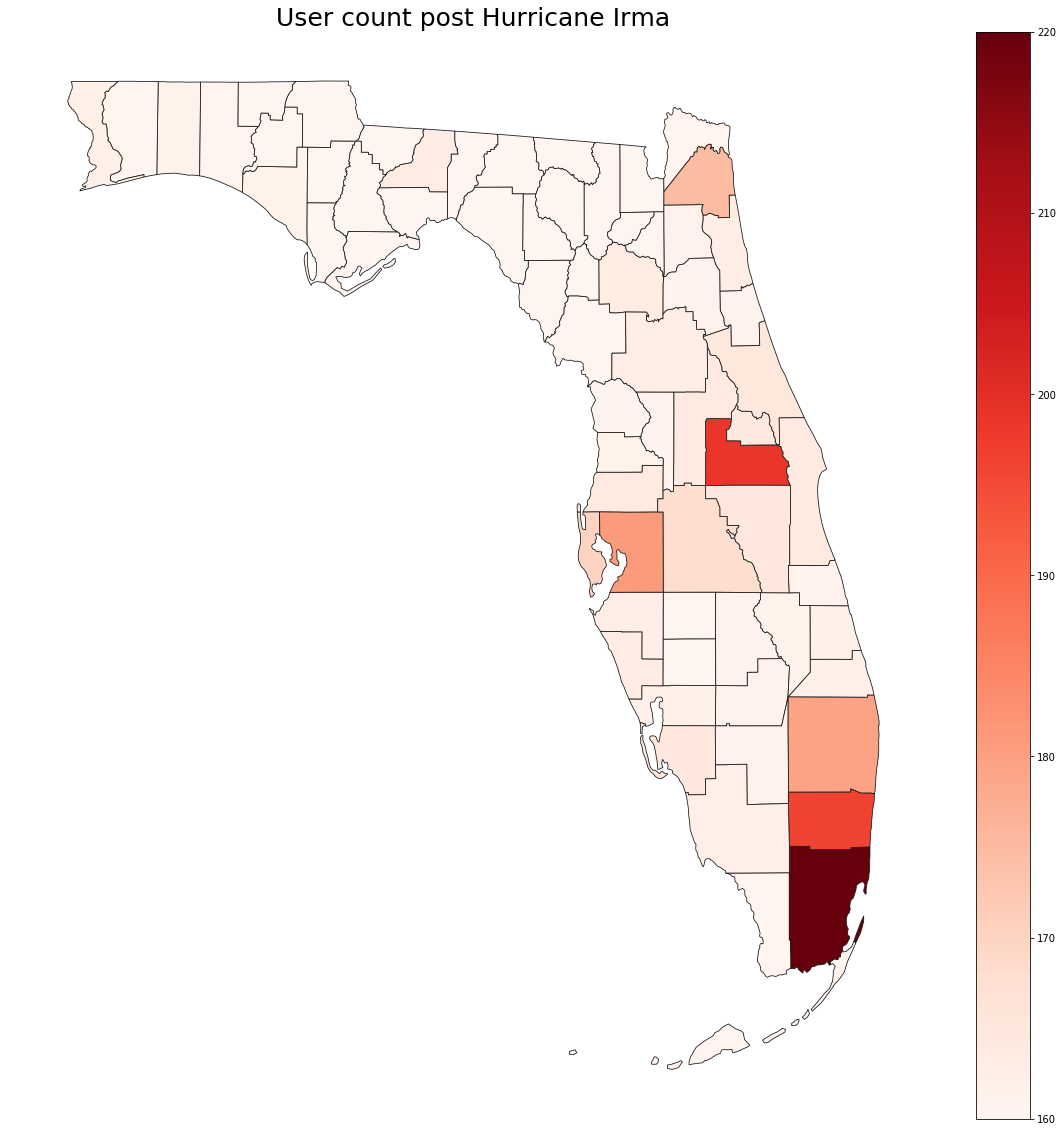

In [142]:
merged=polyy.set_index('COUNTYFP').join(pointspoly2.set_index('COUNTYFP'))
variable = 'counts'
vmin,vmax=160,220
fig, ax = plt.subplots(1, figsize=(20,20))
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.1')
ax.axis('off')
ax.set_title('User count post Hurricane Irma', fontdict= {'fontsize': '25', 'fontweight': '3'})
sm= plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [143]:
#df_poly=[pointsonpoly["user_id"],pointsonpoly["NAME"],pointsonpoly1["NAME"],pointsonpoly2["NAME"]]

In [144]:
#df_poly1=pd.DataFrame(df_poly)

In [145]:
#df_poly1.head()

In [173]:

df_new=pointsonpoly[['user_id','STATEFP','NAME']].copy()
df_new1=pointsonpoly1[['NAME','STATEFP']].copy()
df_new2=pointsonpoly2[['NAME','STATEFP']].copy()



In [174]:
df_new.head()

,user_id,STATEFP,NAME
0,4642,12,Brevard
1,10285,12,Orange
2,15253,12,Miami-Dade
3,20653,12,Broward
4,66253,12,Orange


In [175]:
df_county=pd.concat([df_new['user_id'], df_new['STATEFP'], df_new['NAME'], df_new1['NAME'],df_new1['STATEFP'], df_new2['NAME'], df_new2['STATEFP']], axis=1)

In [176]:
df_county.columns = ['user_id', 'STATEFP','Name1','Name2','STATEFP2','Name3', 'STATEFP3']

In [177]:
df_county=df_county[(df_county['STATEFP'] == '12')]

In [178]:
len(df_county)

4717

In [179]:
df_county.head()

,user_id,STATEFP,Name1,Name2,STATEFP2,Name3,STATEFP3
0,4642,12,Brevard,Brevard,12,Brevard,12
1,10285,12,Orange,Marion,12,Lake,12
2,15253,12,Miami-Dade,Miami-Dade,12,Miami-Dade,12
3,20653,12,Broward,Broward,12,Broward,12
4,66253,12,Orange,Orange,12,Orange,12


In [180]:
c1=df_county[(df_county['Name1'] <> df_county['Name2'])]

In [181]:
len(c1)

1623

In [182]:
c2=df_county[(df_county['Name1'] <> df_county['Name3'])]

In [183]:
len(c2)

1512

In [184]:
df_countyy=df_county[(df_county['Name1'].isin(['Brevard','Broward','Charlotte','Collier','Flagler','Glades','Hardee','Hendry','Indian River','Lee','Manatee', 'Martin', 'Miami-Dade', 'Monroe', 'Palm Beach', 'Pinellas', 'St. Lucie'   ]) )]

In [158]:
PPP=df_county.groupby(["Name1"]).size().reset_index(name="counts")
PPP=PPP.sort_values('counts', ascending=False)
PPP.head(100)
PPP.to_csv("Before.csv")

In [159]:
P=df_county.groupby(["Name2"]).size().reset_index(name="counts")
P=P.sort_values('counts', ascending=False)
P.head(100)
P.to_csv("During.csv")

In [160]:
Pp=df_county.groupby(["Name3"]).size().reset_index(name="counts")
Pp.to_csv("After.csv")

In [161]:
co_matt = pd.crosstab(df_countyy.Name1, df_countyy.Name2)
co_matt

Name2,Alachua,Baker,Baldwin,Barbour,Ben Hill,Berkeley,Blount,Bradford,Brantley,Brevard,...,Tift,Treutlen,Turner,Tuscaloosa,Volusia,Ware,Washington,Wilcox,Wilkinson,Worth
Name1,,,,,,,,,,,,,,,,,,,,,
Brevard,0,0,0,0,0,0,0,0,0,42,...,0,0,0,0,1,0,0,0,1,0
Broward,0,0,0,0,0,0,0,2,0,2,...,0,0,0,0,2,0,0,0,0,0
Charlotte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Collier,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Flagler,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Glades,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hardee,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hendry,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Indian River,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


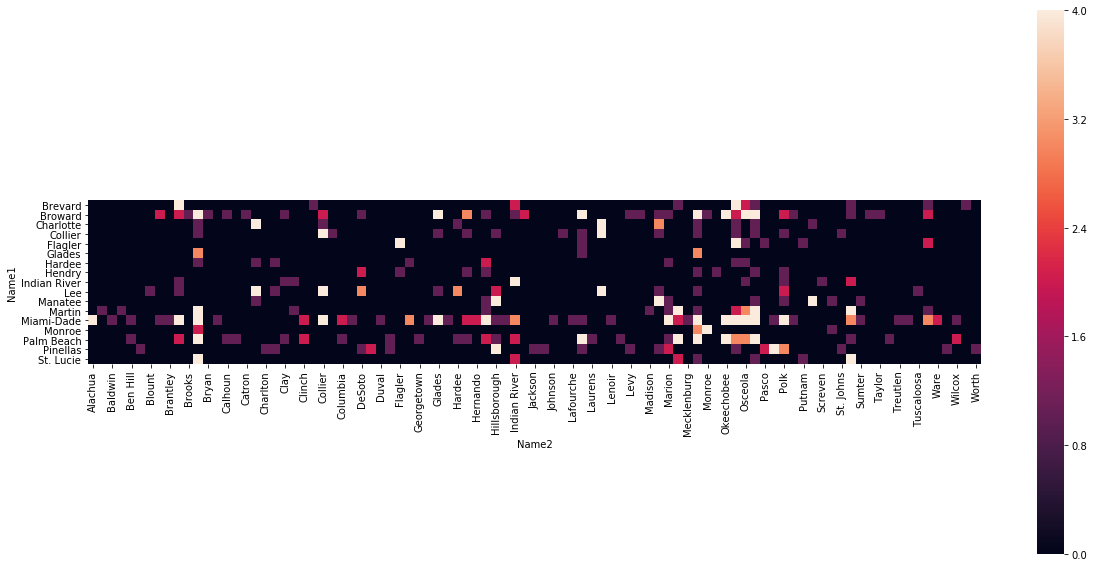

In [162]:
f, ax= plt.subplots(figsize=(20,10))
sns.heatmap(co_matt, vmax=4, square=True)
plt.show()

In [163]:
df_county.head()

,user_id,STATEFP,Name1,Name2,STATEFP2,Name3,STATEFP3
0,4642,12,Brevard,Brevard,12,Brevard,12
1,10285,12,Orange,Marion,12,Lake,12
2,15253,12,Miami-Dade,Miami-Dade,12,Miami-Dade,12
3,20653,12,Broward,Broward,12,Broward,12
4,66253,12,Orange,Orange,12,Orange,12


In [185]:
co_mat = pd.crosstab(df_county.Name1, df_county.Name2)
co_mat

Name2,Aiken,Alachua,Atkinson,Bacon,Baker,Baldwin,Barbour,Bay,Ben Hill,Berkeley,...,Walton,Ware,Washington,Wayne,Webster,Wilcox,Wilkes,Wilkinson,Williamsburg,Worth
Name1,,,,,,,,,,,,,,,,,,,,,
Alachua,0,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Baker,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Bay,0,0,0,0,0,0,0,14,0,0,...,2,0,1,0,0,0,0,0,0,0
Bradford,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brevard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Broward,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Calhoun,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Charlotte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Citrus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


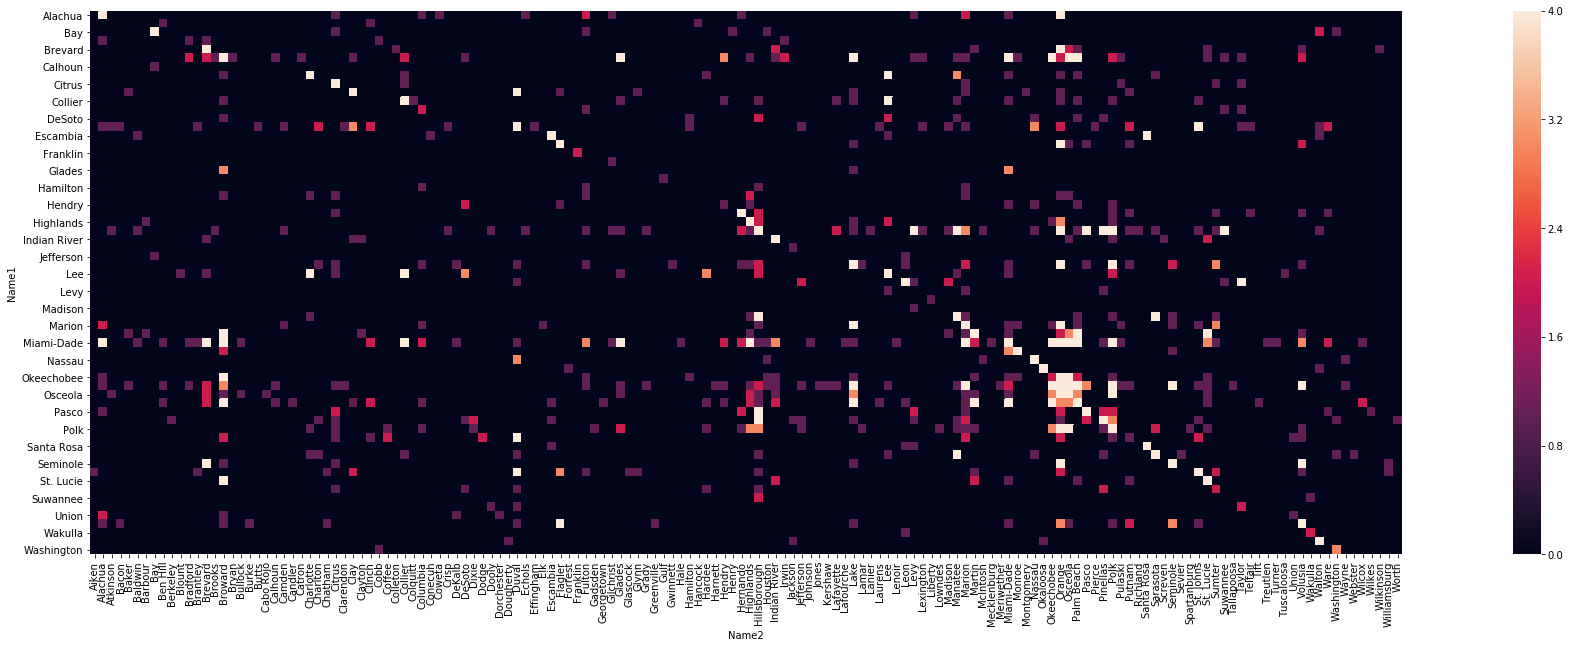

In [186]:
f, ax= plt.subplots(figsize=(40,10))
sns.heatmap(co_mat, vmax=4, square=True)
plt.show()

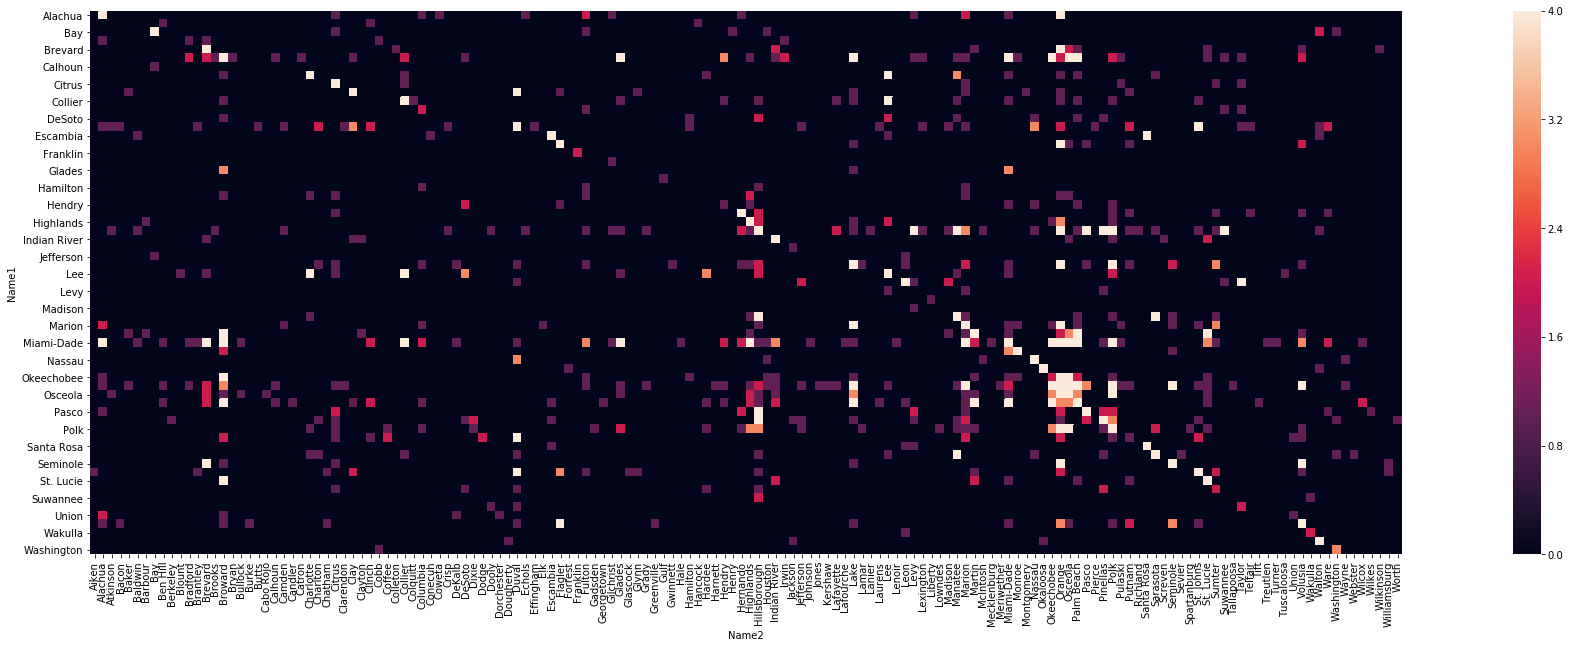

In [187]:
f, ax= plt.subplots(figsize=(40,10))
sns.heatmap(co_mat, vmax=4, square=True)
plt.show()

In [188]:
df_county1=df_county[(df_county['STATEFP2'] == '12')]

In [189]:
len(df_county1)

4336

In [190]:
co_mat1 = pd.crosstab(df_county1.Name1, df_county1.Name2)
co_mat1


Name2,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Johns,St. Lucie,Sumter,Suwannee,Taylor,Union,Volusia,Wakulla,Walton,Washington
Name1,,,,,,,,,,,,,,,,,,,,,
Alachua,29,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Bay,0,0,14,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,1
Bradford,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brevard,0,0,0,0,42,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
Broward,0,0,0,2,2,398,1,0,0,1,...,0,1,0,1,1,0,2,0,0,0
Calhoun,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Charlotte,0,0,0,0,0,1,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
Citrus,0,0,0,0,0,0,0,0,6,0,...,0,0,1,0,1,0,0,0,0,0
Clay,0,1,0,0,0,0,0,0,0,10,...,0,0,0,0,0,0,0,0,0,0


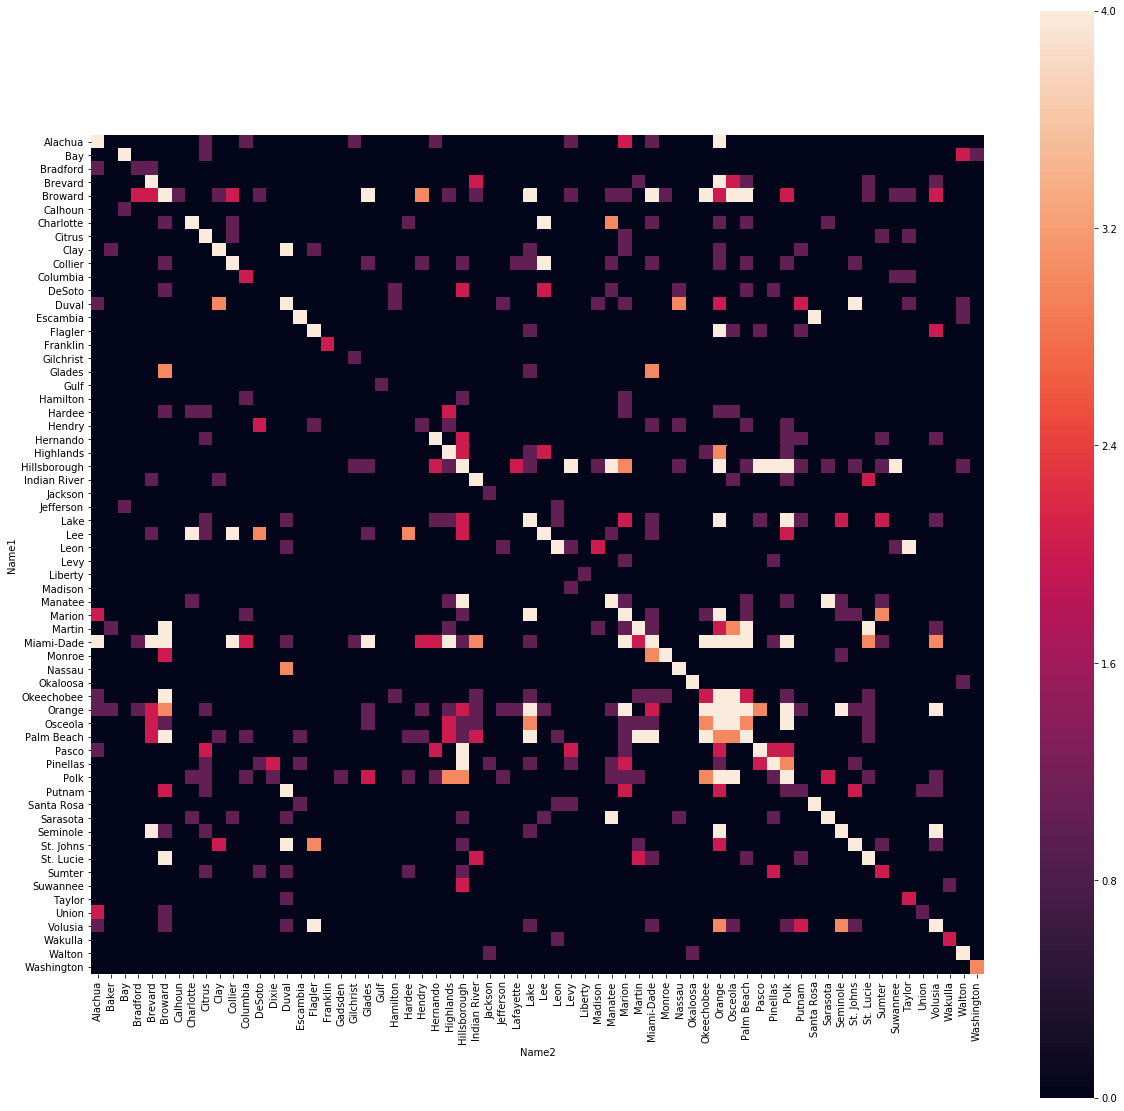

In [191]:
f, ax= plt.subplots(figsize=(20,20))
sns.heatmap(co_mat1, vmax=4, square=True)
plt.show()

In [192]:
df_county11=df_county[(df_county['STATEFP2'] <> '12')]

In [486]:
co_mat11 = pd.crosstab(df_county11.Name1, df_county11.Name2)
co_mat11

Name2,Aiken,Atkinson,Bacon,Baldwin,Barbour,Ben Hill,Berkeley,Blount,Brantley,Brooks,...,Tuscaloosa,Ware,Washington,Wayne,Webster,Wilcox,Wilkes,Wilkinson,Williamsburg,Worth
Name1,,,,,,,,,,,,,,,,,,,,,
Alachua,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Baker,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bradford,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brevard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Broward,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Citrus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Clay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Collier,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


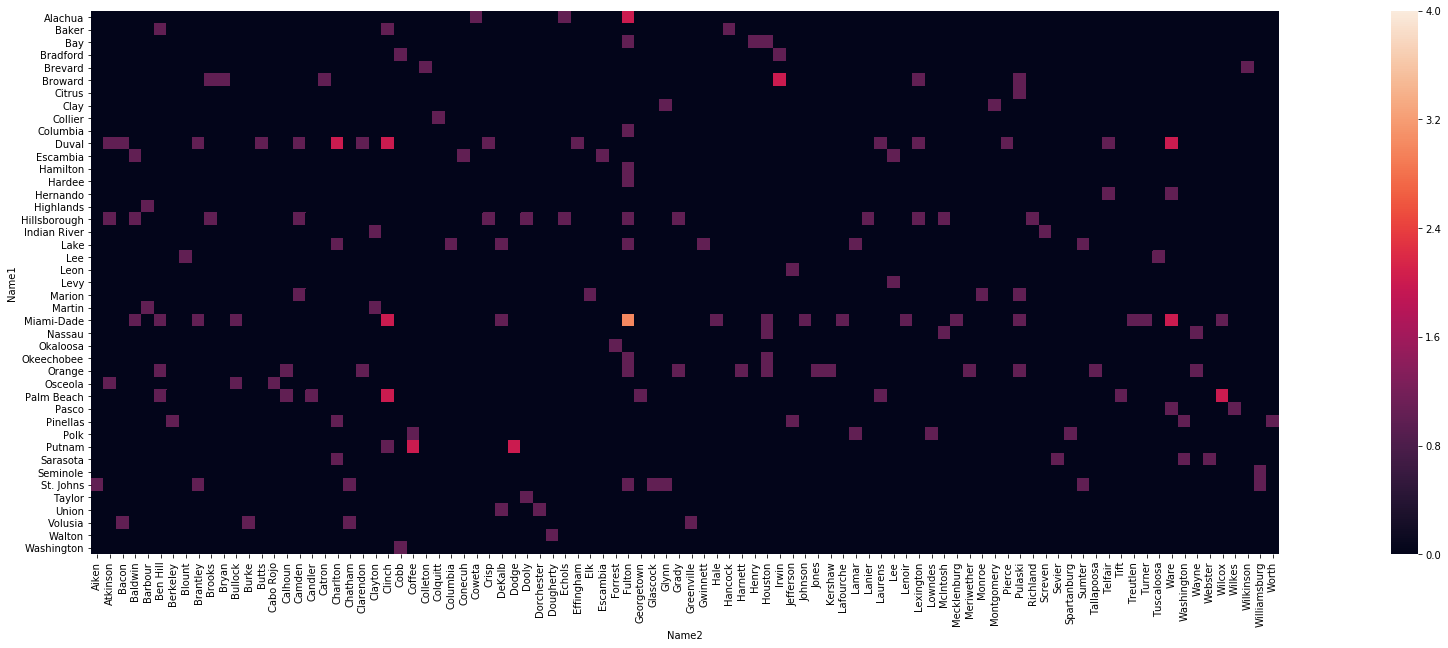

In [487]:
f, ax= plt.subplots(figsize=(40,10))
sns.heatmap(co_mat11, vmax=4, square=True)
plt.show()

In [488]:
co_mat111 = pd.crosstab(df_county11.STATEFP, df_county11.STATEFP2)
co_mat111

STATEFP2,01,13,20,22,28,35,37,45,47,72
STATEFP,,,,,,,,,,
12,18,128,1,1,3,1,5,17,2,1


In [489]:
polyyY=poly[(poly['STATEFP'].isin(['12','01','13','20','22','28','35','37','45','47','72'  ]) )]

In [490]:

PP=df_county11.groupby(["STATEFP2"]).size().reset_index(name="counts")
PP.head()

,STATEFP2,counts
0,01,18
1,13,128
2,20,1
3,22,1
4,28,3


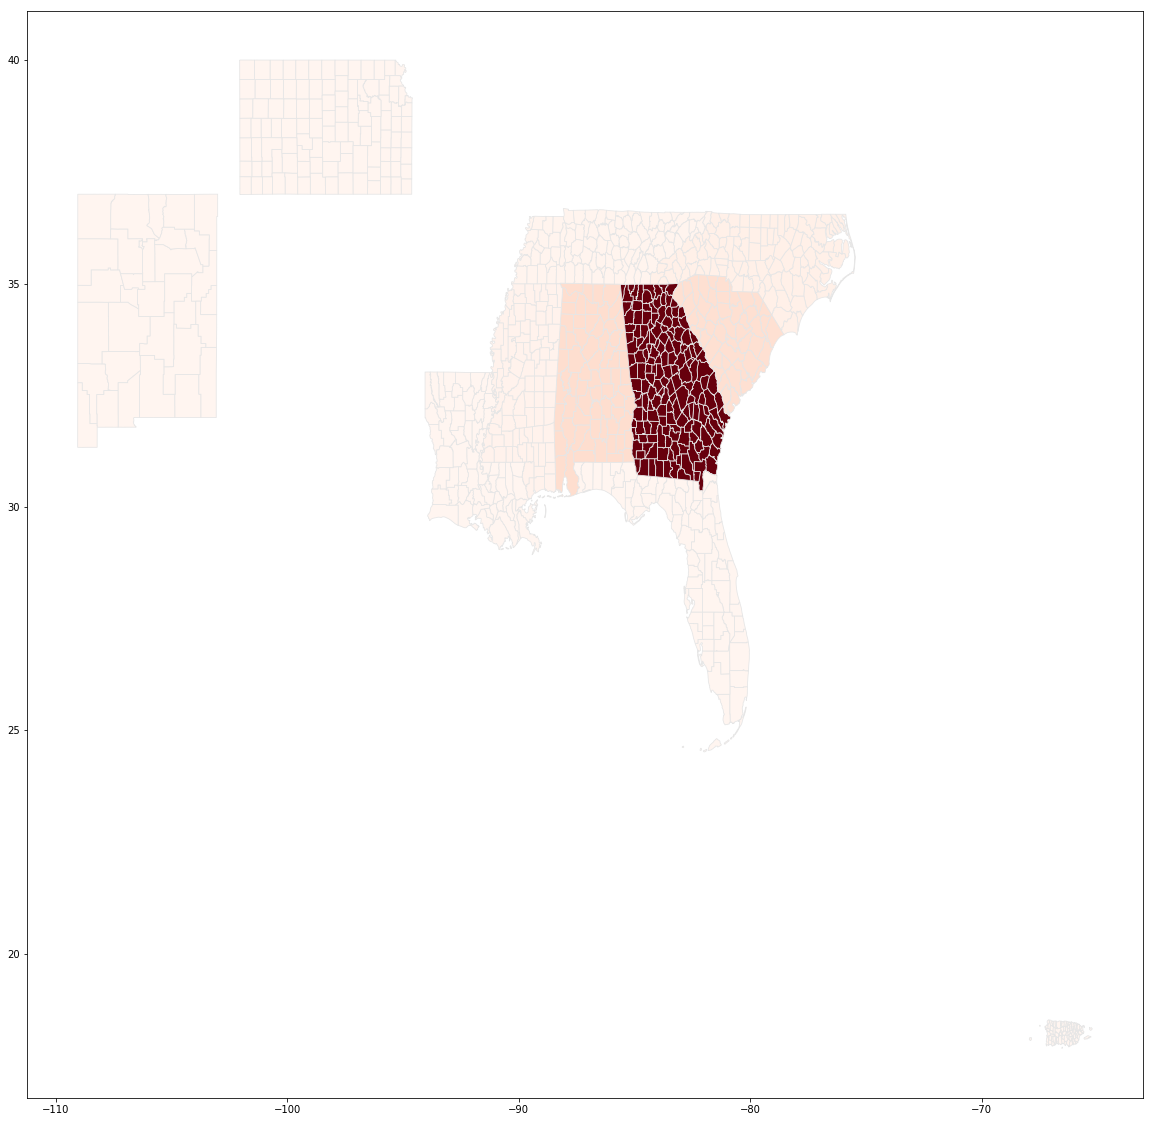

In [491]:
merged=polyyY.set_index('STATEFP').join(PP.set_index('STATEFP2'))
variable = 'counts'
vmin,vmax=160,220
fig, ax = plt.subplots(1, figsize=(20,20))
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.9')
#ax.axis('off')
# ax.set_title('User count post Hurricane Irma', fontdict= {'fontsize': '25', 'fontweight': '3'})
# sm= plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm._A = []
# cbar = fig.colorbar(sm)

In [501]:
co_mat2 = pd.crosstab(df_county.Name1, df_county.Name3)
co_mat2

Name3,Aiken,Alachua,Allendale,Anderson,Appling,Atkinson,Bacon,Baker,Barbour,Bay,...,Thomas,Union,Volusia,Wakulla,Walton,Ware,Washington,Wayne,Wilcox,Yuma
Name1,,,,,,,,,,,,,,,,,,,,,
Alachua,0,33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Baker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bay,0,1,0,0,0,0,0,0,0,18,...,0,0,0,0,0,0,0,0,0,0
Bradford,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brevard,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Broward,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Calhoun,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Charlotte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Citrus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


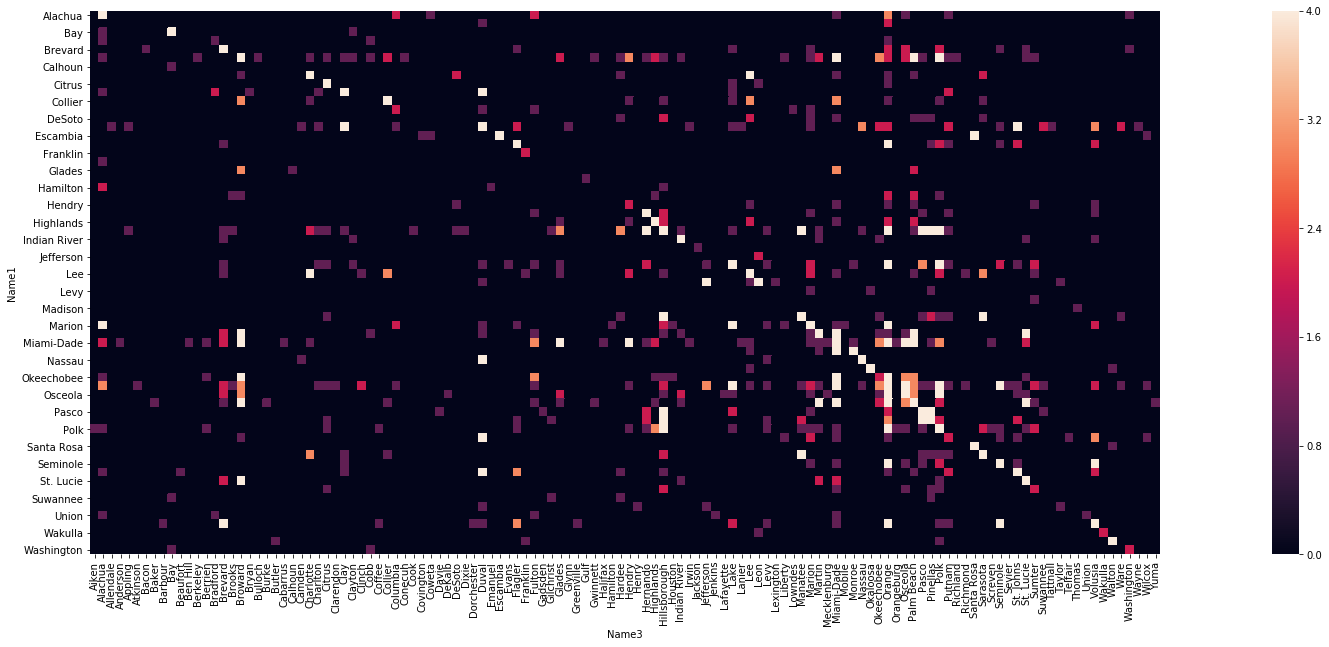

In [500]:
f, ax= plt.subplots(figsize=(40,10))
sns.heatmap(co_mat2, vmax=4, square=True)
plt.show()

In [198]:
df_county2=df_county[(df_county['STATEFP3'] == '12')]

In [199]:
len(df_county2)

4432

In [200]:
co_mat22 = pd.crosstab(df_county2.Name1, df_county2.Name3)
co_mat22

Name3,Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,...,St. Johns,St. Lucie,Sumter,Suwannee,Taylor,Union,Volusia,Wakulla,Walton,Washington
Name1,,,,,,,,,,,,,,,,,,,,,
Alachua,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Baker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bay,1,0,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bradford,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brevard,0,0,0,0,44,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Broward,1,0,0,0,0,424,0,1,1,1,...,0,1,1,0,0,0,0,0,0,0
Calhoun,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Charlotte,0,0,0,0,0,1,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
Citrus,0,0,0,0,0,0,0,0,6,0,...,0,0,0,0,0,0,0,0,0,0


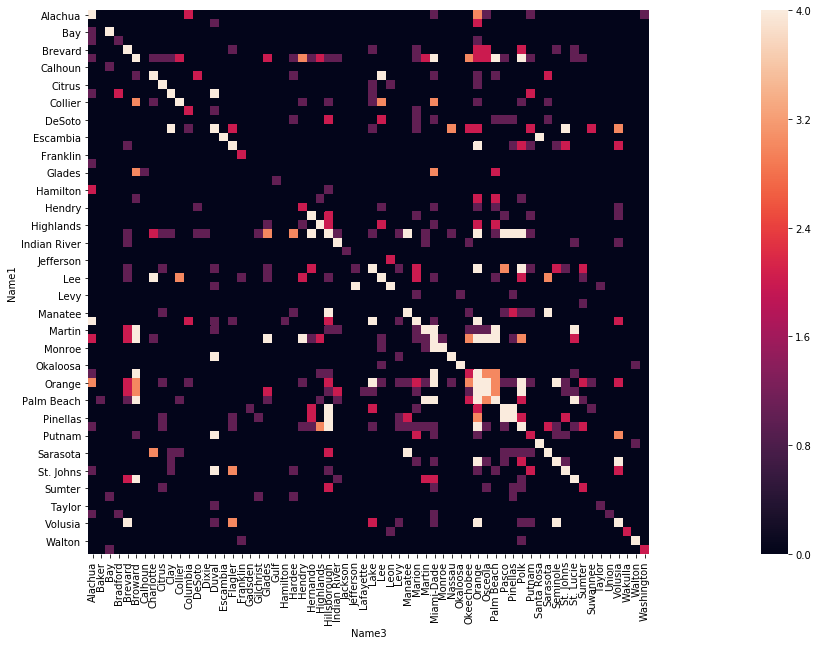

In [201]:
f, ax= plt.subplots(figsize=(40,10))
sns.heatmap(co_mat22, vmax=4, square=True)
plt.show()

In [202]:
df_county22=df_county[(df_county['STATEFP3'] <> '12')]

In [509]:
co_mat222 = pd.crosstab(df_county22.Name1, df_county22.Name3)
co_mat222

Name3,Aiken,Allendale,Anderson,Appling,Atkinson,Bacon,Barbour,Beaufort,Ben Hill,Berkeley,...,Sevier,Sumter,Tattnall,Telfair,Thomas,Ware,Washington,Wayne,Wilcox,Yuma
Name1,,,,,,,,,,,,,,,,,,,,,
Alachua,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bradford,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Brevard,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Broward,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Clay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Columbia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Duval,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,2,0,1,0,0
Escambia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


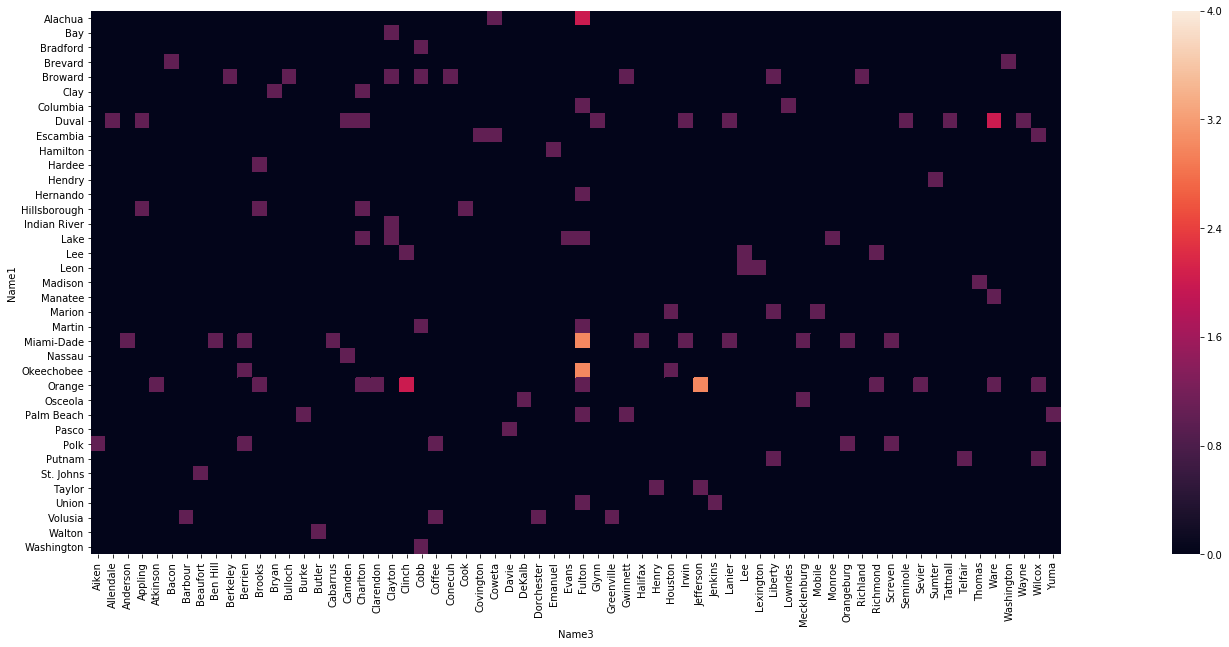

In [510]:
f, ax= plt.subplots(figsize=(40,10))
sns.heatmap(co_mat222, vmax=4, square=True)
plt.show()

In [511]:
co_mat223 = pd.crosstab(df_county22.STATEFP, df_county22.STATEFP3)
co_mat223

STATEFP3,01,08,13,22,37,45,47,51
STATEFP,,,,,,,,
12,10,1,85,1,7,13,1,1


In [512]:
polyy=poly[(poly['STATEFP'].isin(['12','01','08','13','22','37','45','47','51'  ]) )]

In [513]:
PPP=df_county22.groupby(["STATEFP3"]).size().reset_index(name="counts")
PPP.head()

,STATEFP3,counts
0,01,10
1,08,1
2,13,85
3,22,1
4,37,7


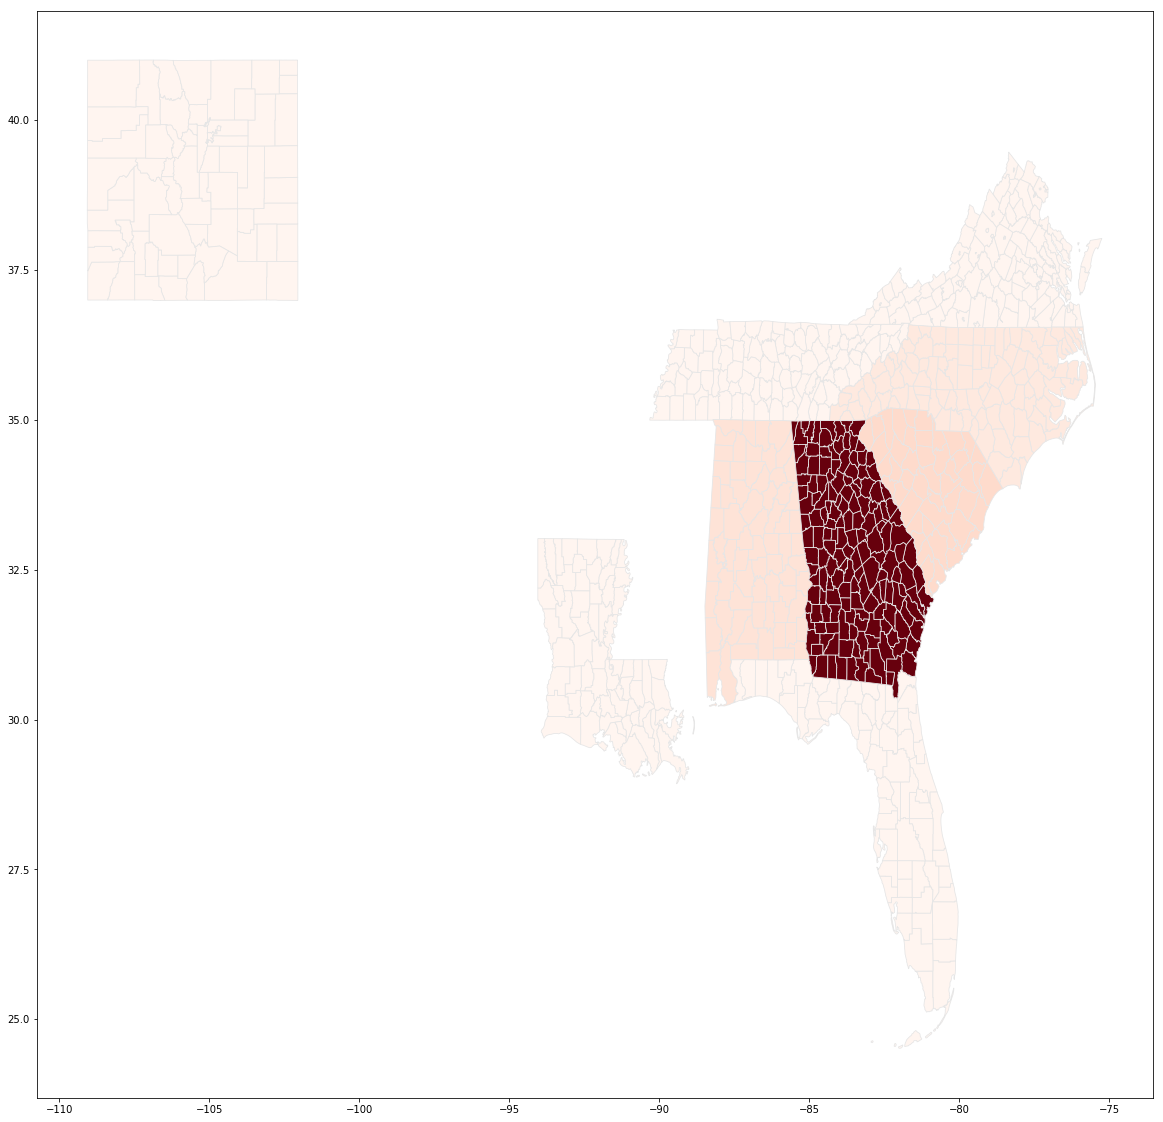

In [514]:
merged=polyy.set_index('STATEFP').join(PPP.set_index('STATEFP3'))
variable = 'counts'
vmin,vmax=160,220
fig, ax = plt.subplots(1, figsize=(20,20))
merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.9')
#ax.axis('off')
# ax.set_title('User count post Hurricane Irma', fontdict= {'fontsize': '25', 'fontweight': '3'})
# sm= plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# sm._A = []
# cbar = fig.colorbar(sm)